In [1]:
#imports model
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np

#imports visualisatie
import matplotlib.pyplot as plt

trainingsdata inladen

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

In [3]:
train_y.shape

(50000, 1)

In [4]:
np.unique(train_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

10 classes met 5000 plaatjes elk in de trainset

In [5]:
np.unique(test_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

en nog eens 1000 plaatjes per class in de test set

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

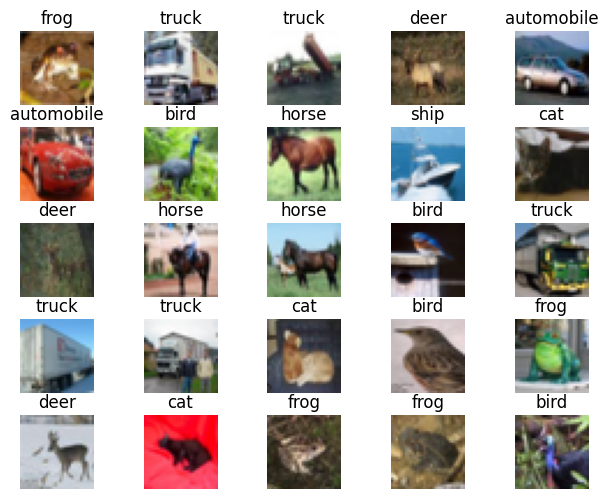

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=5)
for i in range(25):
    ax[i // 5, i % 5].imshow(train_x[i], )
    ax[i // 5, i % 5].set_title(class_names[train_y[i][0]])
    ax[i // 5, i % 5].axis('off')
    
plt.tight_layout(pad=0)
plt.show()

In [8]:
train_x[0].shape

(32, 32, 3)

plaatjes van 32 bij 32 met 3 layers (RGB)

normaliseren zorgt voor een betere performance(accuracy) van het model en het zorgt ook dat het model stabieler is tijdens het trainen i.e. het verbeterd gelijdelijker

In [9]:
train_x = train_x / 255 # 0-255 is de range van elke waarde in rgb
test_x = test_x / 255

### Het model <br>
Een cnn bestaat normaliter uit 2 verschillende fases <br>

de hidden layers <br>
In de hidden layers van het model zitten de convolutional layers en de pooling layers. De convolutional layers hebben een soort van filter dat over een gedeelte van het plaatje en schuiven het filter over het hele plaatje. De pooling layers nemen een wiskundige berekeningen (bijvoorbeeld het maximale van de waardes) van een gedeelte van het plaatje en geven die door aan de volgende layer <br>

In [10]:
###### sequential model dus geen loops ofzo
model = models.Sequential()

# ik heb gekozen voor de relu activatiefunctie omdat die door verschillende bronnen als beste wordt gezien, 
# het geeft 0 terug als de waarde onder de 0 is anders geeft hij het getal terug dat het was

# het is slim om het aantal filters op te laten lopen door je model heen, omdat vooral voor foto's de data nogal "vies" is
# en we leiden we eerste de grote voormen van de afbeeldingen af

# ook een oneven kernel size is beter omdat je anders rekening moet houden dat niet alle 

# ook maak ik gebruik van pooling layers om de layers wat kleiner te maken en het daardoor makkelijker uit te rekenen is
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

de classification layers <br>
hier vind alles plaats dat nodig is voor de classification van de output van de hidden layers, de multi dimensionale output van de hidden layers wordt omgezet naar 1d (een flatten layer), daarna komt een fully connected layer (een "normale" layer die we zelf hebben gemaakt in vorige practica) en daarna nog een fully connected layer voor de output van het model (dus 10 nodes bij ons want we hebben 10 classes) 

In [11]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
# de SparseCategoricalCrossentropy loss functie is de meest gebruikte loss functie voor image classification, 
# we moeten from_logits=true gebruiken omdat de output van het model niet is genormaliseerd, i.e. geen softmax functie

# het adam optimizer algoritme is een extensie/verbetering van het stochastic gradient descent en het wordt gebruik in
# onder andere computer vision en natural language processing dus het is een goede keus voor ons en het performt een stuk
# beter dan het normale gradient descent algoritme
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 15 epochs zodat we kunnen zien of/waneer hij gaat overfitten
model_trained = model.fit(train_x, train_y, epochs=20, 
                    validation_data=(test_x, test_y))


Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4818 - accuracy: 0.4565 - val_loss: 1.2439 - val_accuracy: 0.5552
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1000 - accuracy: 0.6111 - val_loss: 1.0600 - val_accuracy: 0.6282
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9533 - accuracy: 0.6645 - val_loss: 1.0574 - val_accuracy: 0.6344
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8636 - accuracy: 0.6986 - val_loss: 0.9239 - val_accuracy: 0.6734
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7935 - accuracy: 0.7218 - val_loss: 0.8658 - val_accuracy: 0.7026
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7292 - accuracy: 0.7439 - val_loss: 1.0207 - val_accuracy: 0.6506
Epoch 7/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6815 - accuracy: 0.7613 - val_loss: 0.9115 -

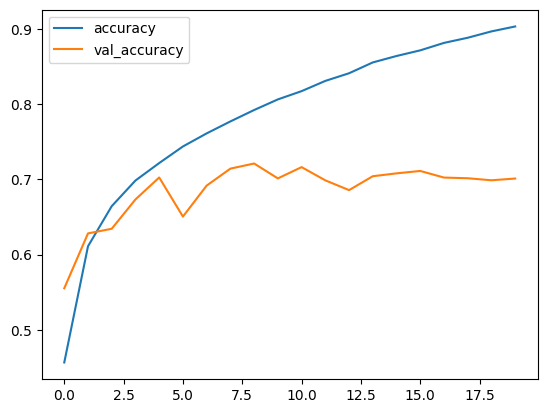

In [13]:
plt.plot(model_trained.history['accuracy'], label='accuracy')
plt.plot(model_trained.history['val_accuracy'], label = 'val_accuracy')

plt.legend()
plt.show()

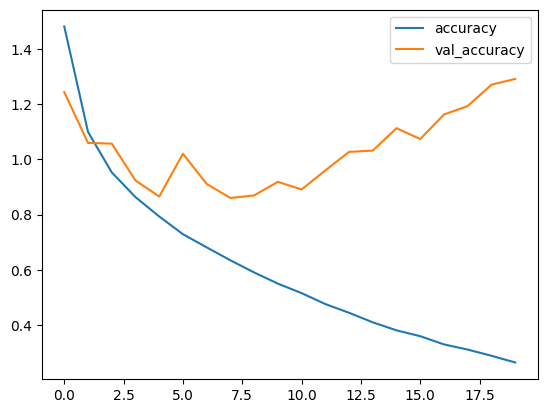

In [14]:
plt.plot(model_trained.history['loss'], label='accuracy')
plt.plot(model_trained.history['val_loss'], label = 'val_accuracy')

plt.legend()
plt.show()

In [15]:
max(model_trained.history['val_accuracy'])

0.7211999893188477

de baseline in dit geval is het willekeurig kiezen van classes, dan zou de accuracy ongeveer 10% zijn omdat 100/10 = 10. Mijn model haalt na 9 epochs 72.1% accuracy. Daarna gaat hij overfitten, de val loss/acc wordt niet meer beter het gaat zelfs een beetje naar beneden. Ik ben wel blij met dit model maar er zijn waarschijnlijk nog andere manieren van model opbouwen / andere layers die zorgen voor een beter resultaat